### Financial Inclusion in Africa Starter Notebook


This is a simple starter notebook to get started with the Financial Inclusion Competition on Zindi.

This notebook covers:
- Loading the data
- Simple EDA and feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model

### Importing libraries

In [28]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
#from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#from google.colab import files
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import argparse
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import RandomizedSearchCV

### 1. Load the dataset

In [3]:
# Load files into a pandas dataframe
df = pd.read_csv('data/Train.csv')
theirtest = pd.read_csv('data/Test.csv')

In [3]:
# Let’s observe the shape of our datasets.
print('train data shape :', df.shape)

train data shape : (23524, 13)


The above output shows the number of rows and columns for train and test dataset. We have 13 variables in the train dataset, 12 independent variables and 1 dependent variable. In the test dataset, we have 12 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [4]:
# inspect train data
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
df.tail()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
# Check for missing values
print('missing values:', df.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset. We will now check the duplicated rows.

In [7]:
# check if there are duplicated rows
df.duplicated().sum()

0

### 2. Data cleaning: duplicates

We want to understand if some of the data are redundant or artificially fabricated. We are particularly interested in 
* `uniqueid`: it will be dropped in the ML model
* `year` 
* `country` 


In [4]:
df1 = df.drop(columns = ['uniqueid'])
df1.duplicated().sum()

4429

In [9]:
df.shape

(23524, 13)

In [6]:
### Function that remove columns from df and calculates the percentages of duplicated rows
def remove_duplicates(df, cols):
    """ 
    Parameters: 
    df - DataFrame with the data
    cols - set of columns to remove from df 
    
    
    Output: 
    df_clean : the dataset where we remove the given columns and the duplicated rows
    
    It also prints the percentage of duplicate columns that have been removed
    
    """
    # Drops the specified columns
    df_clean = df.drop(columns=cols)
    
    # Calculate the total number of rows in the DataFrame
    total_rows = len(df_clean)
    
    # Calculate the number of duplicate rows
    duplicate_rows = df_clean.duplicated().sum()
    
    # Calculate the percentage of duplicate rows
    duplicate_percentage = (duplicate_rows / total_rows) * 100
    
    df_clean = df_clean.drop_duplicates()
    
    # Display the percentage of duplicate rows
    print(f"The number of duplicated rows after removing {cols} is {duplicate_rows}")
    print(f"The percentage of duplicate rows in the dataset after removing {cols} is {duplicate_percentage.round(5)}")
    print(f"The shape of the cleaned dataset after removing {cols} and duplicated rows is is {df_clean.shape}")
    
    # Check the distribution of the bank_account variable
    bank = df_clean['bank_account'].value_counts(normalize=True).round(5) * 100
    # Display the distribution
    print("Bank Account Distribution:")
    print(bank)
    
    return df_clean

In [7]:
df_0 = remove_duplicates(df, [])
print("="*100)
df_clean1 = remove_duplicates(df, ['uniqueid'])
print("="*100)
df_clean2 = remove_duplicates(df, ['year'])

print("="*100)
df_clean3 = remove_duplicates(df, ['country'])

The number of duplicated rows after removing [] is 0
The percentage of duplicate rows in the dataset after removing [] is 0.0
The shape of the cleaned dataset after removing [] and duplicated rows is is (23524, 13)
Bank Account Distribution:
bank_account
No     85.921
Yes    14.079
Name: proportion, dtype: float64
The number of duplicated rows after removing ['uniqueid'] is 4429
The percentage of duplicate rows in the dataset after removing ['uniqueid'] is 18.82758
The shape of the cleaned dataset after removing ['uniqueid'] and duplicated rows is is (19095, 12)
Bank Account Distribution:
bank_account
No     83.477
Yes    16.523
Name: proportion, dtype: float64
The number of duplicated rows after removing ['year'] is 0
The percentage of duplicate rows in the dataset after removing ['year'] is 0.0
The shape of the cleaned dataset after removing ['year'] and duplicated rows is is (23524, 12)
Bank Account Distribution:
bank_account
No     85.921
Yes    14.079
Name: proportion, dtype: floa

In [8]:
df_clean1 = remove_duplicates(df, ['uniqueid', 'year'])
print("="*100)
df_clean2 = remove_duplicates(df, ['uniqueid','country'])
print("="*100)
df_clean3 = remove_duplicates(df, ['uniqueid','country', 'year'])

The number of duplicated rows after removing ['uniqueid', 'year'] is 4429
The percentage of duplicate rows in the dataset after removing ['uniqueid', 'year'] is 18.82758
The shape of the cleaned dataset after removing ['uniqueid', 'year'] and duplicated rows is is (19095, 11)
Bank Account Distribution:
bank_account
No     83.477
Yes    16.523
Name: proportion, dtype: float64
The number of duplicated rows after removing ['uniqueid', 'country'] is 4481
The percentage of duplicate rows in the dataset after removing ['uniqueid', 'country'] is 19.04863
The shape of the cleaned dataset after removing ['uniqueid', 'country'] and duplicated rows is is (19043, 11)
Bank Account Distribution:
bank_account
No     83.458
Yes    16.542
Name: proportion, dtype: float64
The number of duplicated rows after removing ['uniqueid', 'country', 'year'] is 5310
The percentage of duplicate rows in the dataset after removing ['uniqueid', 'country', 'year'] is 22.57269
The shape of the cleaned dataset after remo

### 3. Visualizations on the original dataset df

In [13]:
years = df.year.unique()
for year in years:
    print(year, df[df['year'] == year].country.unique())

2018 ['Kenya' 'Uganda']
2016 ['Rwanda']
2017 ['Tanzania']


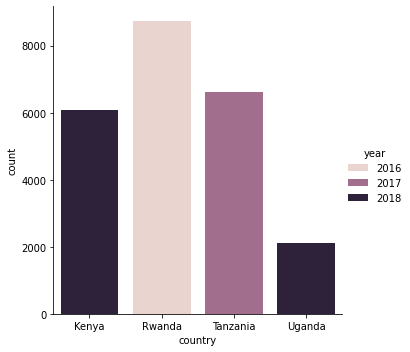

In [14]:
# Plot target distribution considering year and country
sns.catplot(x="country", hue="year", kind="count", data=df)
plt.show()

**Remark**: We see that only 3 years are available and each year collect data from different countries 

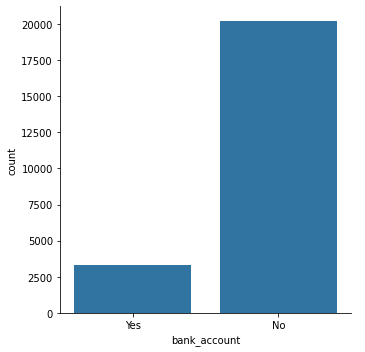

In [15]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=df)

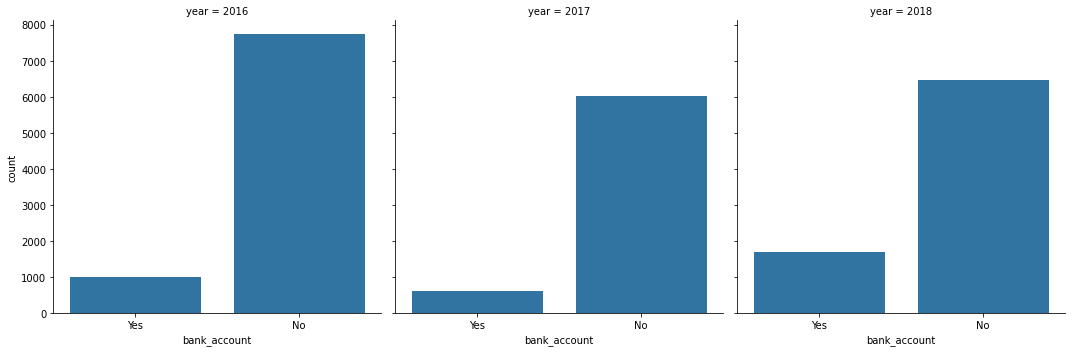

In [16]:
# Plot target distribution considering year
sns.catplot(x="bank_account", col="year", kind="count", data=df)
plt.show()

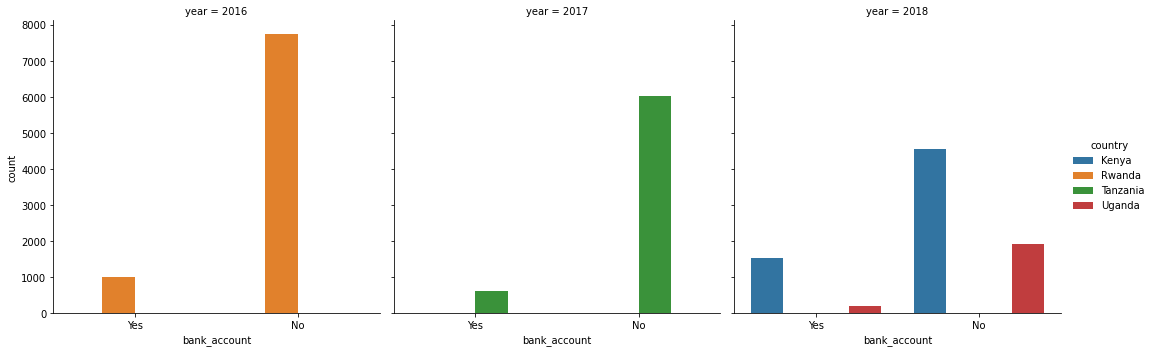

In [17]:
# Plot target distribution considering year and country
sns.catplot(x="bank_account", hue="country", col="year", kind="count", data=df)
plt.show()

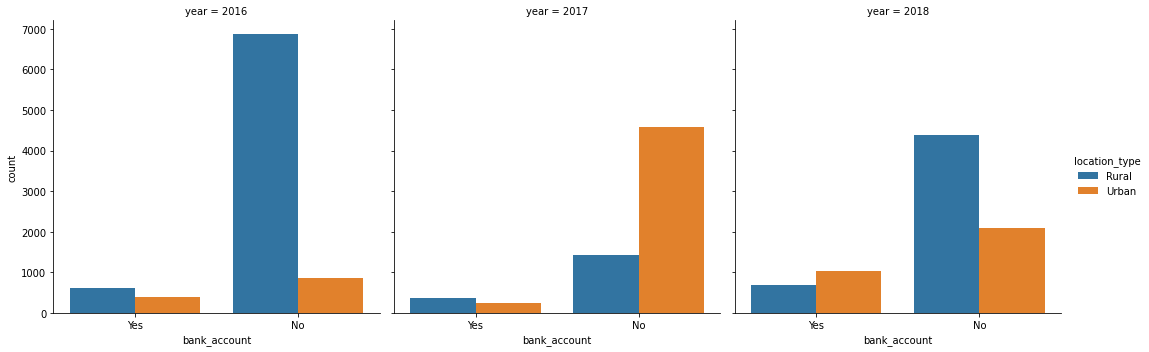

In [18]:
df_loc = df.drop(columns = 'country').drop_duplicates()
# Plot target distribution considering year and country
sns.catplot(x="bank_account", hue="location_type", col="year", kind="count", data=df_loc)
plt.show()

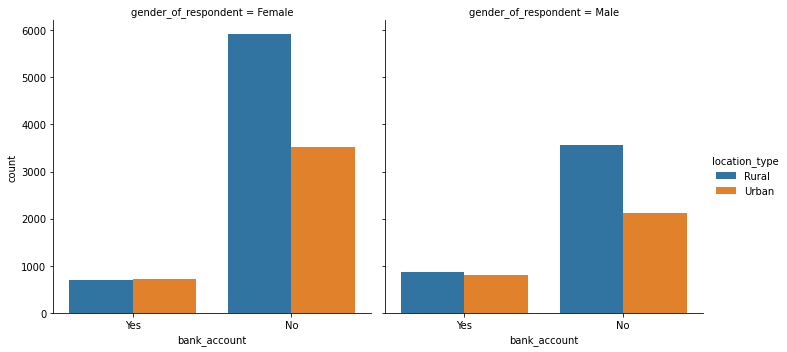

In [19]:
df_loc = df.drop(columns = ['country', 'uniqueid', 'year']).drop_duplicates()
# Plot target distribution considering year and country
sns.catplot(x="bank_account", hue="location_type", col="gender_of_respondent", kind="count", data=df_loc)
plt.show()

**Remark** The dataset is highly unbalanced. This will be important for the classes. 

### 4. Visualisations on df_clean3

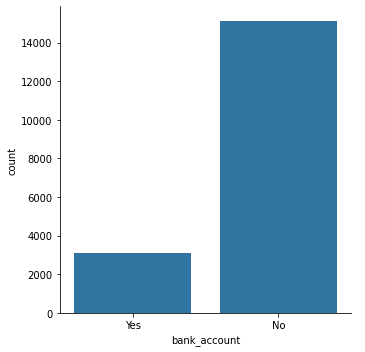

In [20]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=df_clean3)

In [21]:
df_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18214 entries, 0 to 23523
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   bank_account            18214 non-null  object
 1   location_type           18214 non-null  object
 2   cellphone_access        18214 non-null  object
 3   household_size          18214 non-null  int64 
 4   age_of_respondent       18214 non-null  int64 
 5   gender_of_respondent    18214 non-null  object
 6   relationship_with_head  18214 non-null  object
 7   marital_status          18214 non-null  object
 8   education_level         18214 non-null  object
 9   job_type                18214 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.5+ MB


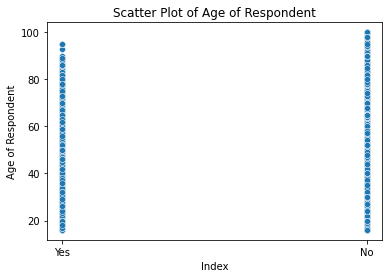

In [22]:
sns.scatterplot(data = df_clean3, x='bank_account', y = 'age_of_respondent')
plt.xlabel('Index')  # Label for x-axis, you can change it to another feature if desired
plt.ylabel('Age of Respondent')  # Label for y-axis
plt.title('Scatter Plot of Age of Respondent')  # Title of the plot
plt.show()

<Axes: ylabel='age_of_respondent'>

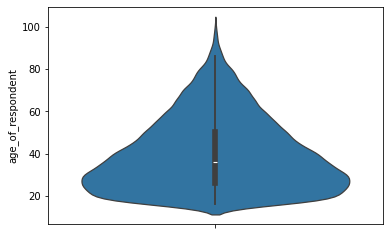

In [23]:
sns.violinplot(data = df_clean3, y = 'age_of_respondent')

In [24]:
df_clean3.age_of_respondent.describe()

count    18214.000000
mean        39.656199
std         17.120479
min         16.000000
25%         26.000000
50%         36.000000
75%         50.000000
max        100.000000
Name: age_of_respondent, dtype: float64

In [25]:
# THIS CAN BE REMOVED: Create an age group feature with numerical values
df_clean3['age_group'] = pd.cut(df_clean3['age_of_respondent'], bins=[0, 26, 36, 50, np.inf], labels=[0, 1, 2, 4])
df_clean3 = df_clean3.drop(columns = 'age_of_respondent')

In [26]:
df_clean3.head()

,bank_account,location_type,cellphone_access,household_size,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_group
0,Yes,Rural,Yes,3,Female,Spouse,Married/Living together,Secondary education,Self employed,0
1,No,Rural,No,5,Female,Head of Household,Widowed,No formal education,Government Dependent,4
2,Yes,Urban,Yes,5,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0
3,No,Rural,Yes,5,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,1
4,No,Urban,No,8,Male,Child,Single/Never Married,Primary education,Informally employed,0


<Axes: xlabel='bank_account', ylabel='household_size'>

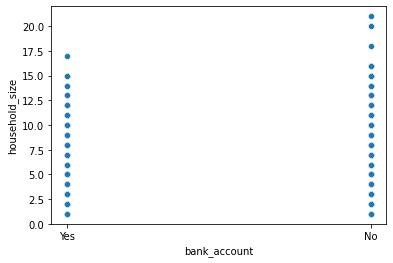

In [27]:
sns.scatterplot(data = df_clean3, x='bank_account', y = 'household_size')

In [28]:
df_clean3.household_size.describe()

count    18214.000000
mean         3.859998
std          2.319803
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

## 5. Encode Categorical Features 

We use one-hot encoder to encode the categorical features and generate a new DataFrame 

In [9]:
df_clean3.head(10)

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed
6,No,Rural,Yes,7,32,Female,Spouse,Married/Living together,Primary education,Self employed
7,No,Rural,Yes,1,42,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Yes,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,No,Urban,Yes,3,76,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [12]:
from sklearn.preprocessing import OneHotEncoder

# Select only the columns with object dtype
categorical_cols = df_clean3.select_dtypes(include=['object']).columns
categorical_df = df_clean3[categorical_cols]

# One-hot encode categorical features with handling of unknown categories
ohe = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')  
encoded_features = ohe.fit_transform(categorical_df)
encoded_columns = ohe.get_feature_names_out(categorical_df.columns)

# Create DataFrame from encoded features
df_clean4 = pd.DataFrame(encoded_features, columns=encoded_columns)

In [56]:
df_clean4.columns

Index(['bank_account_Yes', 'location_type_Urban', 'cellphone_access_Yes',
       'gender_of_respondent_Male', 'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Dont know', 'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Farming and Fishing', 'job_type_Formally employed Government',
       'job_type_Formally employed Private', 'job_type_Government Dependent',
       'job_type_Informally employed', 'job_type_No Income',
       'job_type_Other Income', 'job_type_Remittance Dependent',


In [57]:
df_clean4.head(10)

,bank_account_Yes,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont know,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
df_clean4.head(20)

,household_size,age_group,bank_account_Yes,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,3.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,7.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,7.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1.0,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,4,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3.0,4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Check for missing values
missing_values = df_clean4.isnull().sum()
print("Missing values:\n", missing_values)

# Check data types of columns
print("Data types:\n", df_clean4.dtypes)

Missing values:
 bank_account_Yes                                   0
location_type_Urban                                0
cellphone_access_Yes                               0
gender_of_respondent_Male                          0
relationship_with_head_Head of Household           0
relationship_with_head_Other non-relatives         0
relationship_with_head_Other relative              0
relationship_with_head_Parent                      0
relationship_with_head_Spouse                      0
marital_status_Dont know                           0
marital_status_Married/Living together             0
marital_status_Single/Never Married                0
marital_status_Widowed                             0
education_level_Other/Dont know/RTA                0
education_level_Primary education                  0
education_level_Secondary education                0
education_level_Tertiary education                 0
education_level_Vocational/Specialised training    0
job_type_Farming and Fishing 

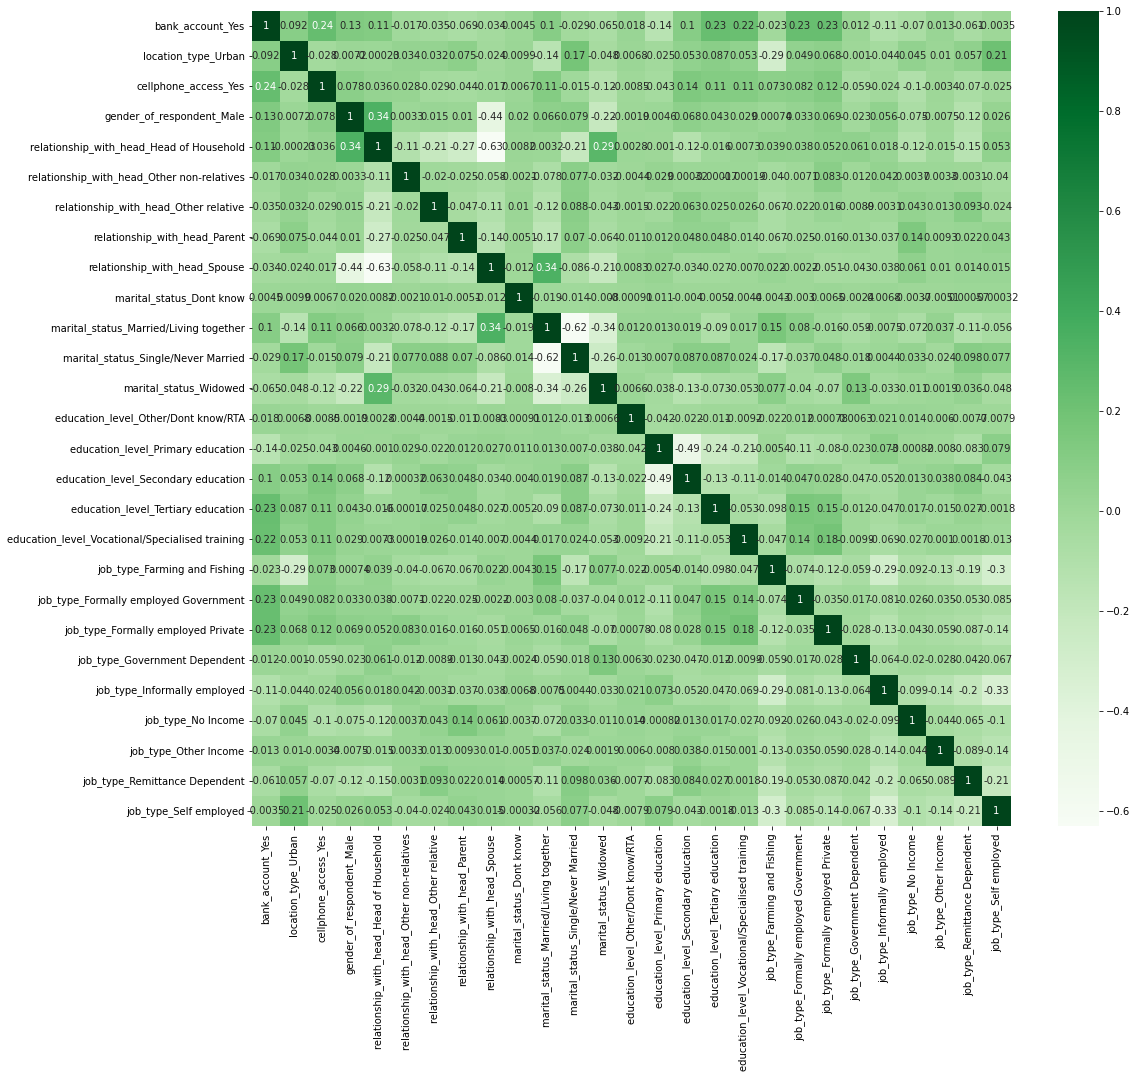

In [59]:
## Visualize the heatmap
plt.figure(figsize=(17, 15))  
sns.heatmap(data = df_clean4.corr(), cmap = 'Greens', annot = True)
plt.show()

## 6. Feature Selection

We use RandomForest to select the 15 most important features. We save the result in a new database `selected_df`. 

In [14]:
# Feature selection and second dataset: selected_df
from sklearn.ensemble import RandomForestClassifier

X = df_clean4.drop(columns = 'bank_account_Yes')
y = df_clean4['bank_account_Yes']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
top_features = feature_importances.nlargest(15, 'importance')['feature'].tolist()

print(top_features)
selected_df = df_clean4[top_features + ['bank_account_Yes']]
print(selected_df.shape)

['cellphone_access_Yes', 'education_level_Tertiary education', 'job_type_Formally employed Government', 'education_level_Vocational/Specialised training', 'job_type_Formally employed Private', 'location_type_Urban', 'gender_of_respondent_Male', 'education_level_Secondary education', 'relationship_with_head_Head of Household', 'marital_status_Married/Living together', 'marital_status_Single/Never Married', 'education_level_Primary education', 'job_type_Informally employed', 'job_type_Self employed', 'relationship_with_head_Spouse']
(18214, 16)


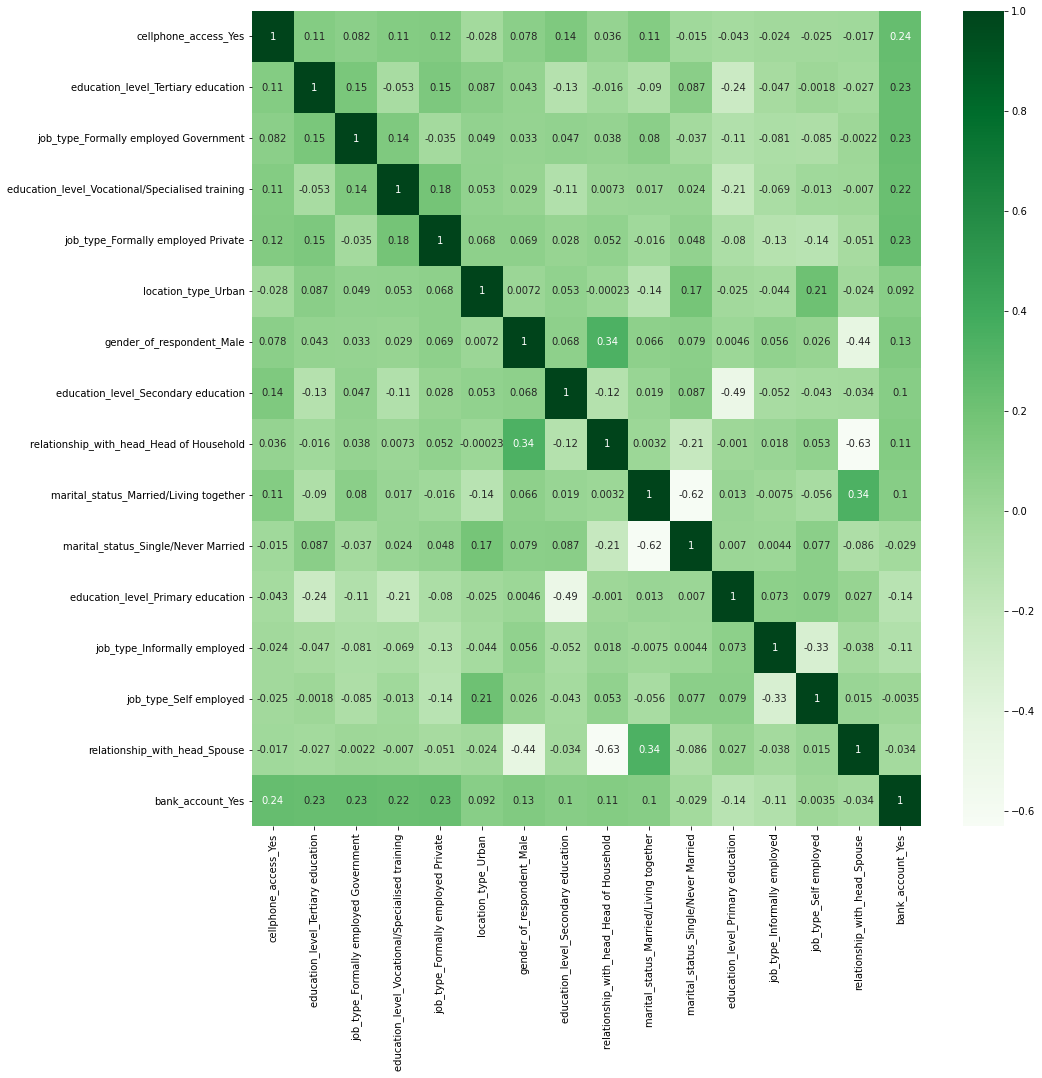

In [61]:
# Plot the heatmap of the new dataset 
plt.figure(figsize=(15, 15))  
sns.heatmap(data = selected_df.corr(), cmap = 'Greens', annot = True)
plt.show()

## 5. Prepare the dataset for Training

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [17]:
### Function to undersample the majority class
def undersample_balance_dataset(df, minority_ratio=0.5, target_variable='bank_account'):
    """
    Undersamples the majority class in a DataFrame to balance the dataset.

    Parameters:
    - df: DataFrame containing the dataset.
    - minority_ratio: Ratio of the minority class in the balanced dataset. Default is 0.5.
    - target_variable: Name of the target variable. Default is 'bank_account'.

    Returns:
    - balanced_df: DataFrame containing the balanced dataset.
    """
    
  # Count the number of samples in each class
    class_counts = df[target_variable].value_counts(normalize = True)
    print(class_counts)

    # Determine the minority and majority classes
    minority_class = class_counts.idxmin()
    majority_class = class_counts.idxmax()

    # Separate the dataframe into minority and majority classes
    minority_df = df[df[target_variable] == minority_class]
    majority_df = df[df[target_variable] == majority_class]

    majority_size = int(minority_ratio*minority_df.shape[0]/(1-minority_ratio))
    # Sample from majority class to match minority class ratio
    majority_sampled = majority_df.sample(majority_size)
    
    # Concatenate minority and sampled majority classhttp://localhost:8888/notebooks/EDA_Financial_Inclusion.ipynb#
    balanced_df = pd.concat([minority_df, majority_sampled])
    class_counts = balanced_df[target_variable].value_counts()
    print(class_counts)
    
    # Shuffle the balanced dataframe
    balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)
    return balanced_df

In [18]:
# Split the data into features (X) and target variable (y)
X =  df_clean4.drop('bank_account_Yes', axis=1)  # Features
y =  df_clean4['bank_account_Yes']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

df_train = pd.concat([X_train, y_train], axis=1)

In [118]:
df_balanced = undersample_balance_dataset(df_train, minority_ratio=0.50, target_variable='bank_account_Yes')
df_balanced.head()

bank_account_Yes
0.0    0.830279
1.0    0.169721
Name: proportion, dtype: float64
bank_account_Yes
1.0    2473
0.0    2473
Name: count, dtype: int64


,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont know,marital_status_Married/Living together,...,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,bank_account_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
X_train_balanced = df_balanced.drop('bank_account_Yes', axis=1)
y_train_balanced = df_balanced['bank_account_Yes']

## 5. Models and Predictions

In [ ]:
#todo: put results in a table?

In [120]:
def project_model(X_train, y_train, X_test, y_test, random_seed):
    #voting classifier
    voting = "hard" #can be soft
    logi_weights = { 0 : 0.4, 1: 0.6}
    svc_weight = {0 : 1, 1: 3}
    xgscale = [1.2, 1.3] #scale_pos_weight
    forest_weights = { 0 : 0.6, 1: 0.4}

    #0.74 precision 0.83 recall balanced set
    #0.32 precision 0.85 recall imbalanced set
    tuned_logistic = LogisticRegression(solver='liblinear', penalty='l1', max_iter=120, C=13, class_weight=logi_weights)
    tuned_logistic.fit(X_train, y_train)

    #0.84 precision 0.63 recall bal
    #0.48 precision 0.63 recall imba
    tuned_forest = RandomForestClassifier(n_estimators=200, min_samples_split=6, min_samples_leaf=3,
                                max_depth=15, criterion='entropy', bootstrap=True, class_weight=forest_weights)
    tuned_forest.fit(X_train, y_train)

    tuned_xgboost = xgb.XGBClassifier(subsample=0.8, scale_pos_weight=1.2, objective='binary:logistic',
                            min_child_weight=5, max_depth=5, gamma=0.9, eval_metric='auc',
                            eta=0.3, colsample_bytree=0.6)
    tuned_xgboost.fit(X_train, y_train)
    tuned_svc = SVC(kernel='rbf', gamma='auto', degree=3, C=0.1, class_weight=svc_weight)
    tuned_svc.fit(X_train, y_train)
    sith_council = VotingClassifier(estimators = [
                                    ("logistic", tuned_logistic),
                                    ("random_forest", tuned_forest),
                                    ("xgboost", tuned_xgboost),
                                    ("svm", tuned_svc)], voting=voting
    )
    sith_council.fit(X_train, y_train)

    #The great wall of prints

    """
    print("Logistic Regression")
    print("----------")
    print("Classification report on train data:")
    print(classification_report(y_train, tuned_logistic.predict(X_train)))
    print("----------")
    print("Classification report on test data:")
    print(classification_report(y_test, tuned_logistic.predict(X_test)))
    print("----------")
    print("Random Forest")
    print("----------")
    print("Classification report on train data:")
    print(classification_report(y_train, tuned_forest.predict(X_train)))
    print("----------")
    print("Classification report on test data:")
    print(classification_report(y_test, tuned_forest.predict(X_test)))
    print("----------")
    print("XGBoost")
    print("----------")
    print("Classification report on train data:")
    print(classification_report(y_train, tuned_xgboost.predict(X_train)))
    print("----------")
    print("Classification report on test data:")
    print(classification_report(y_test, tuned_xgboost.predict(X_test)))
    print("----------")
    print("SVM")
    print("----------")
    print("Classification report on train data:")
    print(classification_report(y_train, tuned_svc.predict(X_train)))
    print("----------")
    print("Classification report on test data:")
    print(classification_report(y_test, tuned_svc.predict(X_test)))
    print("----------")
    """
    print("Voting Classifier")
    print("----------")
    print("Classification report on train data:")
    print(classification_report(y_train, sith_council.predict(X_train)))
    print("----------")
    print("Classification report on test data:")
    print(classification_report(y_test, sith_council.predict(X_test)))
    print("----------")


In [ ]:
def model_trainer(X_train, y_train, X_test, y_test, random_seed):
    stratify = 0 #switch whether or not to stratify target_variable
    target_variable = "bank_account" #maybe we use this for the next project too
    niter = 100 #number iterators
    num_cv = 5 #num cross validation folds
    verbose=0 #quiet 0 1 2 loud
    num_jobs = -1 #-1 all cpu cores, 1 disables parallelization, 2 uses specified number
    scoring = "f1" #if we want to change scoring for whatever reason
    #todo: random_train_split make it so you randomize splits between models

 
    #not random parameters for logistic
    target_variable = "bank_account" #maybe we use this for the next project too
    niter_logi = 50 #number iterators
    num_cv_logi = 20 #num cross validation folds
    verbose=0 #quiet 0 1 2 loud
    num_jobs = -1 #-1 all cpu cores, 1 disables parallelization, 2 uses specified number
    scoring_logi = "f1" #if we want to change scoring for whatever reason
    random_seed = 42
    penaltea = ['l2', 'l1'] #penalty for logistic regression
    C_log = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] #C for logistic regression
    slogver = [ 'SGD', 'liblinear'] #solver for logistic regression
    miter = [120, 130, 135, 140, 145, 150] #max iterations for logistic regression
    logi_weights = { 0 : 0.1, 1: 0.9}

    #not random parameters for random forest
    niter_forest = 100
    forest_cv = 15
    scoring_forest = "f1"
    nestimators = [10, 25, 55] # num estimators for random forest
    big_deep = [15, 25, 30] #maximum depth for random forest
    min_forest_split = [4, 5, 6, 10, 12] # min_samples split
    min_tea_leafs = [3, 4, 5, 10, 15] #min_samples_leafs
    bootstrap = [True, False] # boostrap
    cryterio = ['gini', 'entropy'] # criterion
    forest_weights = { 0 : 0.5, 1: 0.5}

    #not random params for random xgboost
    xbgeta = [0.2, 0.3, 0.5, 0.75, 1] #eta
    XgammaBOOST = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  #gamma 
    deep_boost = [5, 6, 7, 8] #max_depth
    min_boost_weight = [2, 3, 4, 5] #min_child_weight
    xgboosamplet = [0.5, 0.6, 0.7, 0.8, 0.9] #subsample
    xgbytree = [0.6, 0.8, 1.0] #colsample_bytree
    xgboojective = ["binary:logistic"] #objective
    xgauc = ["auc"] #eval_metric
    xgscale = [1.2, 1.3] #scale_pos_weight
    xgbniter = 50
    xgbcv = 15
    scoring_xgb = "roc_auc"
    
    #not random params for svm
    svm_c = [0.1, 1, 10, 100]
    svm_kernel = ["linear", "rbf", "poly"]
    svm_gamma = ["scale", "auto"]
    svm_degree = [3, 4, 5]
    svc_niter = 10
    svc_cv = 5
    svc_weight = {0 : 1, 1: 5}

    #voting classifier
    voting = "hard" #can be soft


    #print("shape: ", target.shape)
    #print("unique values: ", target.unique())
    #print(train.dtypes)
    #print(target.dtypes)
    #print(target)

    #Darth Loger
    #train logistic
    #high recall, low precision
    tuned_logistic = LogisticRegression(class_weight=logi_weights)

    params = {
        'penalty': penaltea, 
        'C': C_log,
        'solver': slogver,
        'max_iter': miter
    }
    tuned_logistic = RandomizedSearchCV(estimator=tuned_logistic, 
                                        param_distributions=params, 
                                        n_iter=niter_logi, cv=num_cv_logi, 
                                        random_state=random_seed, verbose=verbose,
                                        n_jobs = num_jobs,
                                        scoring=scoring_logi)
    tuned_logistic.fit(X_train, y_train)
    print(tuned_logistic.best_params_)
    tuned_logistic = tuned_logistic.best_estimator_

    #Darth Lorax
    #train random forest
    #0.7 precision 0.3 recall
    tuned_forest = RandomForestClassifier(class_weight=forest_weights)

    params = {
    'n_estimators': nestimators, 
    'max_depth': big_deep,
    'min_samples_split': min_forest_split,
    'min_samples_leaf': min_tea_leafs,
    'bootstrap': bootstrap,
    'criterion': cryterio
    }

    tuned_forest = RandomizedSearchCV(estimator=tuned_forest,
                                        param_distributions=params,
                                        n_iter=niter_forest, cv=forest_cv,
                                        random_state=random_seed, verbose=verbose,
                                        n_jobs = num_jobs,
                                        scoring=scoring_forest)
    tuned_forest.fit(X_train, y_train)
    print(tuned_forest.best_params_)
    tuned_forest = tuned_forest.best_estimator_

    #Darth XGBious
    #train xgboost
    # 0.66 precision 0.33 recall
    tuned_xgboost = xgb.XGBClassifier()

    params = {
        "eta" : xbgeta,
        "gamma": XgammaBOOST,
        "max_depth" : deep_boost,
        "min_child_weight" : min_boost_weight,
        "subsample" : xgboosamplet,
        "colsample_bytree" : xgbytree,
        "objective" : xgboojective,
        "eval_metric" : xgauc,
        "scale_pos_weight" : xgscale
    }
    tuned_xgboost = RandomizedSearchCV(estimator=tuned_xgboost,
                                        param_distributions=params,
                                        n_iter=xgbniter, cv=xgbcv,
                                        random_state=random_seed, verbose=verbose,
                                        n_jobs = num_jobs,
                                        scoring=scoring_xgb)
    tuned_xgboost.fit(X_train, y_train)
    print(tuned_xgboost.best_params_)
    tuned_xgboost = tuned_xgboost.best_estimator_


    #SVM
    
    params = {
        "C" : svm_c,
        "kernel" : svm_kernel,
        "gamma" : svm_gamma,
        "degree" : svm_degree
    }
    tuned_svc = SVC(class_weight = svc_weight)
    tuned_svc = RandomizedSearchCV( estimator=tuned_svc,
                                    param_distributions=params,
                                    n_iter = svc_niter,
                                    cv = svc_cv,
                                    random_state=random_seed
    )
    tuned_svc.fit(X_train, y_train)
    print(tuned_svc.best_params_)
    tuned_svc = tuned_svc.best_estimator_

    #classifier
    sith_council = VotingClassifier(estimators = [
                                    ("logistic", tuned_logistic),
                                    ("random_forest", tuned_forest),
                                    ("xgboost", tuned_xgboost),
                                    ("svm", tuned_svc)], voting=voting
    )
    sith_council.fit(X_train, y_train)


    #The great wall of prints

    print("----------")
    print("Logistic Regression")
    print("----------")
    print("Classification report on train data:")
    print(classification_report(y_train, tuned_logistic.predict(X_train)))
    print("----------")
    print("Classification report on test data:")
    print(classification_report(y_test, tuned_logistic.predict(X_test)))
    print("----------")
    print("Random Forest")
    print("----------")
    print("Classification report on train data:")
    print(classification_report(y_train, tuned_forest.predict(X_train)))
    print("----------")
    print("Classification report on test data:")
    print(classification_report(y_test, tuned_forest.predict(X_test)))
    print("----------")
    print("XGBoost")
    print("----------")
    print("Classification report on train data:")
    print(classification_report(y_train, tuned_xgboost.predict(X_train)))
    print("----------")
    print("Classification report on test data:")
    print(classification_report(y_test, tuned_xgboost.predict(X_test)))
    print("----------")
    print("SVM")
    print("----------")
    print("Classification report on train data:")
    print(classification_report(y_train, tuned_svc.predict(X_train)))
    print("----------")
    print("Classification report on test data:")
    print(classification_report(y_test, tuned_svc.predict(X_test)))
    print("----------")
    print("Voting Classifier")
    print("----------")
    print("Classification report on train data:")
    print(classification_report(y_train, sith_council.predict(X_train)))
    print("----------")
    print("Classification report on test data:")
    print(classification_report(y_test, sith_council.predict(X_test)))
    print("----------")


In [121]:
project_model(X_train_balanced, y_train_balanced, X_test, y_test, 42)

Voting Classifier
----------
Classification report on train data:
              precision    recall  f1-score   support

         0.0       0.81      0.70      0.75      2473
         1.0       0.74      0.83      0.78      2473

    accuracy                           0.77      4946
   macro avg       0.77      0.77      0.77      4946
weighted avg       0.77      0.77      0.77      4946

----------
Classification report on test data:
              precision    recall  f1-score   support

         0.0       0.95      0.68      0.79      3025
         1.0       0.34      0.83      0.49       618

    accuracy                           0.70      3643
   macro avg       0.65      0.75      0.64      3643
weighted avg       0.85      0.70      0.74      3643

----------


In [ ]:
#mess with params for logi 

target_variable = "bank_account" #maybe we use this for the next project too
niter_logi = 50 #number iterators
num_cv_logi = 20 #num cross validation folds
verbose=0 #quiet 0 1 2 loud
num_jobs = -1 #-1 all cpu cores, 1 disables parallelization, 2 uses specified number
scoring_logi = "f1_macro" #if we want to change scoring for whatever reason
random_seed = 42
penaltea = ['l2', 'l1'] #penalty for logistic regression
C_log = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] #C for logistic regression
slogver = [ 'SGD', 'liblinear'] #solver for logistic regression
miter = [120, 130, 135, 140, 145, 150] #max iterations for logistic regression
logi_weights = { 0 : 0.4, 1: 0.6}

tuned_logistic = LogisticRegression(class_weight=logi_weights)

params = {
    'penalty': penaltea, 
    'C': C_log,
    'solver': slogver,
    'max_iter': miter
}

tuned_logistic = RandomizedSearchCV(estimator=tuned_logistic, 
                                    param_distributions=params, 
                                    n_iter=niter_logi, cv=num_cv_logi, 
                                    random_state=random_seed, verbose=verbose,
                                    n_jobs = num_jobs,
                                    scoring=scoring_logi)
tuned_logistic.fit(X_train_balanced, y_train_balanced)
best_params = tuned_logistic.best_params_
tuned_logistic = tuned_logistic.best_estimator_
print("----------")
print("Logistic Regression")
print("----------")
print("Classification report on train data:")
print(classification_report(y_train_balanced, tuned_logistic.predict(X_train_balanced)))
print("----------")
print("----------")
print("Classification report on imba train data:")
print(classification_report(y_train, tuned_logistic.predict(X_train)))
print("----------")
print("Classification report on test data:")
print(classification_report(y_test, tuned_logistic.predict(X_test)))
print("----------")
print(best_params)

In [ ]:
#mess with params for forest

#not random parameters for random forest
niter_forest = 100
forest_cv = 15
scoring_forest = "f1"
nestimators = [50, 100, 150, 200, 250, 300] # num estimators for random forest
big_deep = [8, 9, 10, 11, 12, 13, 14, 15] #maximum depth for random forest
min_forest_split = [3, 4, 5, 6, 10, 12] # min_samples split
min_tea_leafs = [3, 4, 5, 10, 15] #min_samples_leafs
bootstrap = [True, False] # boostrap
cryterio = ['gini', 'entropy'] # criterion
forest_weights = { 0 : 0.6, 1: 0.4}

tuned_forest = RandomForestClassifier(class_weight=forest_weights)

params = {
'n_estimators': nestimators, 
'max_depth': big_deep,
'min_samples_split': min_forest_split,
'min_samples_leaf': min_tea_leafs,
'bootstrap': bootstrap,
'criterion': cryterio
}

tuned_forest = RandomizedSearchCV(estimator=tuned_forest,
                                    param_distributions=params,
                                    n_iter=niter_forest, cv=forest_cv,
                                    random_state=random_seed, verbose=verbose,
                                    n_jobs = num_jobs,
                                    scoring=scoring_forest)
tuned_forest.fit(X_train_balanced, y_train_balanced)
best_params = tuned_forest.best_params_
tuned_forest = tuned_forest.best_estimator_
print("----------")
print("Forest Random")
print("----------")
print("Classification report on train data:")
print(classification_report(y_train_balanced, tuned_forest.predict(X_train_balanced)))
print("----------")
print("Classification report on imba train data:")
print(classification_report(y_train, tuned_forest.predict(X_train)))
print("----------")
print("Classification report on test data:")
print(classification_report(y_test, tuned_forest.predict(X_test)))
print("----------")
print(best_params)


In [137]:
#not random params for random xgboost
xbgeta = [0.05, 0.1, 0.15, 0.2, 0.3] #eta
XgammaBOOST = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  #gamma 
xgb_num_boost= [50, 100, 150, 200, 250] #num iter
deep_boost = [5, 6, 7, 8] #max_depth
min_boost_weight = [2, 3, 4, 5] #min_child_weight
xgboosamplet = [0.5, 0.6, 0.7, 0.8, 0.9] #subsample
xgbytree = [0.6, 0.8, 1.0] #colsample_bytree
xgboojective = ["binary:logistic"] #objective
xgauc = ["auc"] #eval_metric
xgscale = [1.0] #scale_pos_weight
xgbcv = 15
scoring_xgb = "roc_auc"

#mess with params for xgboost
tuned_xgboost = xgb.XGBClassifier()

params = {
    "eta" : xbgeta,
    "gamma": XgammaBOOST,
    "max_depth" : deep_boost,
    "min_child_weight" : min_boost_weight,
    "subsample" : xgboosamplet,
    "colsample_bytree" : xgbytree,
    "objective" : xgboojective,
    "eval_metric" : xgauc,
    "scale_pos_weight" : xgscale,
    'n_estimators' : xgb_num_boost
}
tuned_xgboost = RandomizedSearchCV(estimator=tuned_xgboost,
                                    param_distributions=params, cv=xgbcv,
                                    random_state=random_seed, verbose=verbose,
                                    n_jobs = num_jobs,
                                    scoring=scoring_xgb)
tuned_xgboost.fit(X_train_balanced, y_train_balanced)
best_params = tuned_xgboost.best_params_
tuned_xgboost = tuned_xgboost.best_estimator_
print("----------")
print("gxboost")
print("----------")
print("Classification report on train data:")
print(classification_report(y_train_balanced, tuned_xgboost.predict(X_train_balanced)))
print("----------")
print("Classification report on imba data:")
print(classification_report(y_train, tuned_xgboost.predict(X_train)))
print("----------")
print("Classification report on test data:")
print(classification_report(y_test, tuned_xgboost.predict(X_test)))
print("----------")
print(best_params)

----------
gxboost
----------
Classification report on train data:
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.76      2473
         1.0       0.76      0.76      0.76      2473

    accuracy                           0.76      4946
   macro avg       0.76      0.76      0.76      4946
weighted avg       0.76      0.76      0.76      4946

----------
Classification report on imba data:
              precision    recall  f1-score   support

         0.0       0.94      0.76      0.84     12098
         1.0       0.39      0.76      0.51      2473

    accuracy                           0.76     14571
   macro avg       0.66      0.76      0.68     14571
weighted avg       0.85      0.76      0.78     14571

----------
Classification report on test data:
              precision    recall  f1-score   support

         0.0       0.94      0.77      0.84      3025
         1.0       0.39      0.75      0.52       618

    accuracy         

In [ ]:
#mess with svm
svm_c = [0.1, 1, 2, 3, 4, 5, 6, 10, 12, 13, 15, 17]
svm_kernel = ["linear", "rbf", "poly"]
svm_gamma = ["scale", "auto"]
svm_degree = [3, 4, 5]
svc_niter = 10
svc_cv = 15
svc_weight = {0 : 1, 1: 3}

params = {
    "C" : svm_c,
    "kernel" : svm_kernel,
    "gamma" : svm_gamma,
    "degree" : svm_degree
}
tuned_svc = SVC(class_weight = svc_weight)
tuned_svc = RandomizedSearchCV( estimator=tuned_svc,
                                param_distributions=params,
                                n_iter = svc_niter,
                                cv = svc_cv,
                                random_state=random_seed
)
tuned_svc.fit(X_train, y_train)
best_params = tuned_svc.best_params_
tuned_svc = tuned_svc.best_estimator_
print("----------")
print("svn")
print("----------")
print("Classification report on train data:")
print(classification_report(y_train, tuned_svc.predict(X_train)))
print("----------")
print("Classification report on test data:")
print(classification_report(y_test, tuned_svc.predict(X_test)))
print("----------")
print(best_params)


### Submission